In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import decomposition
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import sklearn.preprocessing as pre_processing
import numpy as np

In [70]:
datasets = pd.read_excel('..\【071】单车日报表.xlsx')

#载入维度数据
x_data = datasets[[ '吨位', '当日有派车次数',
                   '全天行驶里程km', '其中任务行驶里程km', '全天运行时长（点火时长）hh', '其中任务行驶时长hh', '全天静驶时长',
                   '平均时速km/h', '最大扭距', '平均扭距', '急刹车次数', '超速报警次数', '前3日平均运行里程km', '前3日日平均运行时长h',
                   '近4日平均运行里程km', '近4日日平均运行时长h', '怠速次数', '怠速时长mm', '任务百公里油耗（L）', '全里程百公里油耗（L）'
                   , '高档低速次数', '高档低速累计时长mm', '低档高速次数', '低档高速累计时长mm', '空档滑行次数', '空档滑行时长mm',
                   'Can设备状态',  '市趟次数', '一干次数', '二干次数', '里程标杆值km',
                  '实际里程参考值km', '位置总数', '未锁星数', '延迟位置数',
                   '行驶位置数', '间隔大位置数', 'ACC关位置数',  '行驶时长', '拉直线次数', '拉直线总距离', 
                   '设备类型', '在线时长', '里程误差']]
x_data = x_data.replace([np.inf, -np.inf], np.nan)
x_data = x_data.fillna(0)



#分割数据1/4为测试，3/4为训练数据
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data)

#载入标签数据
y_data = datasets['油耗量（当天）']
print(y_train.isnull().any())

print(x_train.info())

'''
'日期y/m/d', '车牌号', '配属单位', '使用单位', '车辆名称', '规格型号', '登记日期', '吨位', '当日有派车次数',
                   '全天行驶里程km', '其中任务行驶里程km', '全天运行时长（点火时长）hh', '其中任务行驶时长hh', '全天静驶时长',
                   '平均时速km/h', '最大扭距', '平均扭距', '急刹车次数', '超速报警次数', '前3日平均运行里程km', '前3日日平均运行时长h',
                   '近4日平均运行里程km', '近4日日平均运行时长h', '怠速次数', '怠速时长mm', '任务百公里油耗（L）', '全里程百公里油耗（L）'
                   , '高档低速次数', '高档低速累计时长mm', '低档高速次数', '低档高速累计时长mm', '空档滑行次数', '空档滑行时长mm',
                   'Can设备状态', '车型', '单位分组', '能源类型',  '市趟次数', '一干次数', '二干次数', '里程标杆值km',
                   '里程利用率', '时长标杆值h', '时长利用率', '实际里程参考值km', '位置总数', '未锁星数', '未锁星占比', '延迟位置数',
                   '行驶位置数', '间隔大位置数', 'ACC关位置数', '行驶时长', '拉直线次数', '拉直线总距离', '设备序列号', 
                   '设备类型', '在线时长', '设备状态', '24小时内离线', '里程误差', '报废状态', '311/388/29/72批次', '294无里程关注', 
                   '930速递', '118重汽'
                   
'''
'''
label=pre_processing.LabelEncoder()
labels=label.fit_transform(['中','符','法','吧'])
print(labels)
'''




#查看非数值的列
unvalue_type = x_data.select_dtypes(include=object, exclude=None)
unvalue_type.columns.values.tolist()



True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2273 entries, 390 to 1258
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   吨位              2273 non-null   float64
 1   当日有派车次数         2273 non-null   float64
 2   全天行驶里程km        2273 non-null   float64
 3   其中任务行驶里程km      2273 non-null   float64
 4   全天运行时长（点火时长）hh  2273 non-null   float64
 5   其中任务行驶时长hh      2273 non-null   float64
 6   全天静驶时长          2273 non-null   float64
 7   平均时速km/h        2273 non-null   float64
 8   最大扭距            2273 non-null   float64
 9   平均扭距            2273 non-null   float64
 10  急刹车次数           2273 non-null   float64
 11  超速报警次数          2273 non-null   float64
 12  前3日平均运行里程km     2273 non-null   float64
 13  前3日日平均运行时长h     2273 non-null   float64
 14  近4日平均运行里程km     2273 non-null   float64
 15  近4日日平均运行时长h     2273 non-null   float64
 16  怠速次数            2273 non-null   float64
 17  怠速时长mm          2273 non-n

[]

In [71]:
# standardize the feature 标准化
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)
x_train_std.shape

(2273, 44)

In [72]:
x_train_std

array([[-0.44262428, -0.24169139, -0.1860165 , ...,  0.        ,
        -0.13013715, -0.01712084],
       [ 0.48448919,  1.68252766,  0.80707673, ...,  0.        ,
        -0.09744532,  0.05047019],
       [-0.44262428, -0.24169139, -0.58264824, ...,  0.        ,
        -0.75128197,  0.02365722],
       ...,
       [ 0.48448919, -0.24169139, -0.58264824, ...,  0.        ,
        -0.75128197,  0.02365722],
       [ 1.17982429, -0.24169139,  0.66174602, ...,  0.        ,
         2.15223706,  0.05996645],
       [-0.55851346, -0.24169139, -0.58264824, ...,  0.        ,
         2.13286412,  0.02365722]])

In [74]:
cov_matrix = np.cov(x_train_std.T)
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
print("values\n ", eigen_val, "\nvector\n ", eigen_vec)# 可以打印看看

values
  [ 1.35742782e+01  4.63561618e+00  2.65345242e+00  2.26592417e+00
  1.90312380e+00  1.66497831e+00  1.42991610e+00  1.23971035e+00
  1.10510351e+00  1.04153268e+00  9.61676221e-01  8.66300209e-01
  8.31373486e-01  7.30768222e-01  6.84714658e-01  5.65245343e-01
  5.25369349e-01  4.58657438e-01  3.94186122e-01  3.79585650e-01
  3.65095718e-01  3.33869879e-01  3.14650318e-01  1.93277307e-01
  1.77063453e-01  1.63122719e-01  1.46277240e-01  1.12452037e-01
  9.65459276e-02  8.69760919e-02  4.16801851e-02  2.58027367e-02
  1.90643142e-02  1.37363762e-02  1.20876274e-02  3.42026159e-03
  9.70366364e-04  6.75191396e-07 -4.61118256e-16 -6.10932249e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00] 
vector
  [[ 0.14106055 -0.10894445 -0.11670664 ...  0.          0.
   0.        ]
 [ 0.09443118 -0.03419338  0.00609593 ...  0.          0.
   0.        ]
 [ 0.24651746 -0.11001466  0.05312278 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...

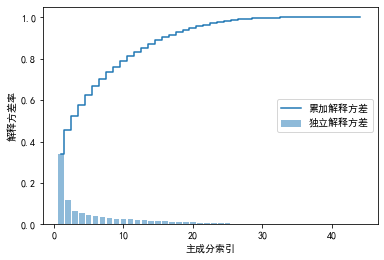

In [75]:
# 解释方差比
tot = sum(eigen_val) # 总特征值和
var_exp = [(i / tot) for i in sorted(eigen_val, reverse=True)] # 计算解释方差比，降序
# print(var_exp)
cum_var_exp = np.cumsum(var_exp) # 累加方差比率
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.bar(range(1, 45), var_exp, alpha=0.5, align='center', label='独立解释方差') # 柱状 Individual_explained_variance
plt.step(range(1, 45), cum_var_exp, where='mid', label='累加解释方差') # Cumulative_explained_variance
plt.ylabel("解释方差率")
plt.xlabel("主成分索引")
plt.legend(loc='right')
plt.show()


In [76]:
# 特征变换
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:, i]) for i in range(len(eigen_val))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True) # (特征值，特征向量)降序排列

In [77]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis])) # 降维投影矩阵W
w

array([[ 0.14106055, -0.10894445],
       [ 0.09443118, -0.03419338],
       [ 0.24651746, -0.11001466],
       [ 0.19257267, -0.25151496],
       [ 0.23058786,  0.08006326],
       [ 0.19212926, -0.24279422],
       [ 0.14863933,  0.16494609],
       [ 0.19689348,  0.11585263],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.14318297,  0.09030959],
       [ 0.02233717, -0.03081819],
       [ 0.22881265, -0.08509791],
       [ 0.21198365,  0.06237815],
       [ 0.24174641, -0.09613001],
       [ 0.22323753,  0.06822534],
       [ 0.1425133 ,  0.30427589],
       [ 0.13473854,  0.27190242],
       [ 0.12746456, -0.02312513],
       [ 0.09547086,  0.14265331],
       [ 0.18341252, -0.03936402],
       [ 0.19634561, -0.21282326],
       [ 0.07329768,  0.32548905],
       [ 0.0703339 ,  0.3149946 ],
       [ 0.15262524, -0.22387394],
       [ 0.1501661 , -0.23723852],
       [-0.12097695, -0.19862113],
       [ 0.07465475, -0.00572569],
       [ 0.13024068,

In [78]:
x_train_pca = x_train_std.dot(w)
x_train_pca

array([[ 0.96382233,  3.28360663],
       [ 2.35525673, -0.66033843],
       [-3.15395351, -1.2107915 ],
       ...,
       [-1.62920936, -1.03666063],
       [ 2.78633451,  0.28978519],
       [-1.9249308 , -0.58637597]])

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


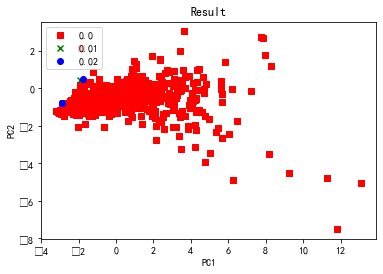

In [79]:
color = ['r', 'g', 'b']
marker = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), color, marker):
    plt.scatter(x_train_pca[y_train == l, 0],
    x_train_pca[y_train == l, 1],
    c=c, label=l, marker=m)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.title('Result')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')
plt.show()

In [80]:
#构建一个神经元-所有特征做训练
#两隐藏层，一个100神经元，一个50神经元，epoch  500次
mlp = MLPClassifier(hidden_layer_sizes = (100,50),max_iter = 500)
y_train = pd.DataFrame(y_train.fillna(0))
y_train = y_train.astype('int')
print(y_train.isnull().any())
mlp.fit(x_train,y_train)

油耗量（当天）    False
dtype: bool


c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [81]:
print(y_test.isnull().any())

False


In [82]:
#做测试
#预测结果
predictions = mlp.predict(x_test)
print(type(predictions))
print(type(y_test))
#预测结果和标签对比
print(classification_report(predictions,y_test> 0.5))
print(confusion_matrix(predictions,y_test> 0.5))

'''
F1值
为了能够评价不同算法的优劣，在Precision和Recall的基础上提出了F1值的概念，来对Precision和Recall进行整体评价。
F1的定义如下： F1值 = 正确率 * 召回率 * 2 / (正确率 + 召回率)
其中列表左边的一列为分类的标签名，右边support列为每个标签的出现次数．avg / total行为各列的均值（support列为总和）． 
precision recall f1-score三列分别为各个类别的精确度/召回率及 F1 F1值．
'''

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       526
           1       0.05      1.00      0.10        13
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00        27
          18       0.

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'\nF1值\n为了能够评价不同算法的优劣，在Precision和Recall的基础上提出了F1值的概念，来对Precision和Recall进行整体评价。\nF1的定义如下： F1值 = 正确率 * 召回率 * 2 / (正确率 + 召回率)\n其中列表左边的一列为分类的标签名，右边support列为每个标签的出现次数．avg / total行为各列的均值（support列为总和）． \nprecision recall f1-score三列分别为各个类别的精确度/召回率及 F1 F1值．\n'

In [84]:
pca = decomposition.PCA(n_components = 44)#降到10维度
pca.fit(x_data)

PCA(n_components=44)

In [85]:
#方差
'''
每个特征从大到小占比
'''
pca.explained_variance_

array([7.83711478e+05, 8.97383209e+04, 3.18475914e+04, 2.30369822e+04,
       1.30855578e+04, 5.27167423e+03, 3.22483018e+03, 2.77641810e+03,
       2.42453781e+03, 1.82702554e+03, 1.46407305e+03, 9.78646023e+02,
       6.60967374e+02, 3.28851421e+02, 2.12473580e+02, 1.09856843e+02,
       9.34556934e+01, 6.22213651e+01, 4.12227878e+01, 2.01490585e+01,
       1.77874591e+01, 1.21120236e+01, 1.09145801e+01, 9.66168129e+00,
       7.67984798e+00, 3.42644419e+00, 1.29177171e+00, 1.03614692e+00,
       1.01512652e+00, 6.09973673e-01, 4.79201098e-01, 1.13214723e-01,
       1.83892483e-02, 1.77120579e-02, 1.29017311e-02, 4.08597852e-03,
       1.17345059e-03, 3.07270433e-06, 5.68202768e-27, 5.68202768e-27,
       5.68202768e-27, 5.68202768e-27, 5.68202768e-27, 5.68202768e-27])

In [86]:
#方差占比
#每个维度占比信息量
pca.explained_variance_ratio_
#一个占比大于81%，信息量太单一

array([8.15531465e-01, 9.33818457e-02, 3.31406565e-02, 2.39723220e-02,
       1.36168532e-02, 5.48571295e-03, 3.35576364e-03, 2.88914528e-03,
       2.52297807e-03, 1.90120580e-03, 1.52351684e-03, 1.01838068e-03,
       6.87803746e-04, 3.42203335e-04, 2.21100360e-04, 1.14317213e-04,
       9.72501497e-05, 6.47476558e-05, 4.28965014e-05, 2.09671437e-05,
       1.85096595e-05, 1.26037918e-05, 1.13577302e-05, 1.00539616e-05,
       7.99166255e-06, 3.56556351e-06, 1.34421978e-06, 1.07821620e-06,
       1.05634234e-06, 6.34739616e-07, 4.98657458e-07, 1.17811429e-07,
       1.91358823e-08, 1.84311968e-08, 1.34255627e-08, 4.25187603e-09,
       1.22109463e-09, 3.19746122e-12, 5.91272744e-33, 5.91272744e-33,
       5.91272744e-33, 5.91272744e-33, 5.91272744e-33, 5.91272744e-33])

In [87]:
#遍历方差占比求和
variance = []
for i in range(len(pca.explained_variance_ratio_)):
    variance.append(sum(pca.explained_variance_ratio_[:i+1]))

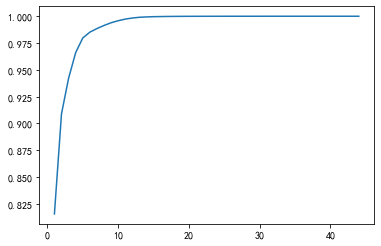

In [88]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),variance)
plt.show()

In [89]:
pca =decomposition.PCA(n_components = 0.90) #>90%信息，所需要的维度
pca.fit(x_data)

PCA(n_components=0.9)

In [90]:
pca.explained_variance_ratio_

array([0.81553146, 0.09338185])

In [91]:
x_train_pca = pca.transform(x_train)
x_train_pca = pd.DataFrame(x_train_pca)
x_train_pca

,0,1
0,-216.805566,-54.312126
1,307.893451,-155.134939
2,-766.838688,-53.693477
3,825.768148,1226.911585
4,-256.952227,-102.328471
...,...,...
2268,-766.838688,-53.693477
2269,-766.839183,-53.693714
2270,-752.730856,-58.450019
2271,671.696304,1056.160794


In [92]:
y_train = y_train.fillna(0)

In [93]:
mlp = MLPClassifier(hidden_layer_sizes = (100,50),max_iter = 500)
y_train = pd.DataFrame(y_train.fillna(0))
y_train = y_train.astype('int')
mlp.fit(x_train_pca,y_train)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [94]:
x_test_pca = pca.transform(x_test)
predictions = mlp.predict(x_test_pca)

#预测结果和标签对比
print(classification_report(predictions,y_test> 0.5))
print(confusion_matrix(predictions,y_test> 0.5))
'''
其中列表左边的一列为分类的标签名，右边support列为每个标签的出现次数．avg / total行为各列的均值（support列为总和）． 
precision recall f1-score三列分别为各个类别的精确度/召回率及 F1 F1值．
'''

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       624
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        60
           9       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         4

    accuracy                           0.67       758
   macro avg       0.11      0.09      0.10       758
weighted avg       0.80      0.67      0.73       758

[[506 118   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  1   7   0   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   0   0]
 [  4  33   0   0   0   0   0   0   0]
 [  1  14   0   0   0   0   0   0   0]
 [  7  53   0   0   0   0   0   0   0]
 [  1   5   0   0   0 

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'\n其中列表左边的一列为分类的标签名，右边support列为每个标签的出现次数．avg / total行为各列的均值（support列为总和）． \nprecision recall f1-score三列分别为各个类别的精确度/召回率及 F1 F1值．\n'

In [107]:
history = mlp.fit(x_train, y_train)
print(history.history.keys())
plt.subplot()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.tight_layout()

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AttributeError: 'MLPClassifier' object has no attribute 'history'

In [1]:
import os
os.getcwd()

'E:\\货车油耗预测\\can-GPS 论文\\单车日报表\\.ipynb_checkpoints'